---
# IBM HR Analytics Case Study: Employee Attrition & Performance

---
Some possible negative impacts of employee attrition on any organization:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact on productivity
> 1. Impact on profit
------
## 📌 Case study questions to consider:
---
> 1. Which factors contribute most to employee attrition?
> 1. What possible measures should the company take to improve employee retention?
> 1. What is the business value of this ML model?
> 1. Will the ML model lead to cost savings for the organization?
> 1. Which particular business unit faces is most impacted by employee attrition?

In [1]:
!pip install -q hvplot

In [2]:
try:
    # Attempt to import a module
    import hvplot
    result = "complete"
except ImportError:
    result = "error with import"
    
print(result)


complete


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [4]:
#Import dataset and view first 10 rows
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   
6                        3  Female          81               4         1   
7                        4    Male          67               3         1   
8                        4    Male          44               2         3   
9                        3    Male          94               3         2   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0            Sales Executive                4        Single           5993   
1         Research Scientist                2       Married           5130   
2      Laboratory Technician                3        Single           2090   
3         Research Scientist                3       Married           2909   
4      Laboratory Technician                2       Married           3468   
5      Laboratory Technician                4        Single           3068   
6      Laboratory Technician                1       Married           2670   
7      Laboratory Technician                3      Divorced           2693   
8     Manufacturing Director                3        Single           9526   
9  Healthcare Representative                3       Married           5237   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   
6         9964                   4      Y      Yes                 20   
7        13335             

---
# 📊 Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count   1470.00          1470.00        1470.00      1470.00   
mean       2.06             2.73        6502.93     14313.10   
std        1.11             1.10        4707.96      7117.79   
min        1.00             1.00        1009.00      2094.00   
25%        1.00             2.00        2911.00      8047.00   
50%        2.00             3.00        4919.00     14235.50   
75%        3.00             4.00        8379.00     20461.50   
max        5.00             4.00       19999.00     26999.00   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count             1470.00            1470.00            1470.00   
mean                 2.69              15.21               3.15   
std                  2.50               3.66               0.36   
min                  0.00              11.00               3.00   
25%                  1.00              12.00               3.00   
50%                  2.00              14.00               3.00   
75%                  4.00              18.00               3.00   
max                  9.00              25.00               4.00   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                   1470.00        1470.00           1470.00   
mean                       2.71          80.00              0.79   
std                        1.08           0.00              0.85   
min                        1.00          80.00              0.00   
25%                        2.00          80.00              0.00   
50%                        3.00          80.00              1.00   
75%                        4.00          80.00              1.00   
max                        4.00          80.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count            1470.00                1470.00          1470.00   
mean               11.28                   2.80             2.76   
std                 7.78                   1.29             0.71   
min                 0.00                   0.00             1.00   
25%                 6.00                   2.00             2.00   
50%                10.00                   3.00             3.00   
75%                15.00                   3.00             3.00   
max                40.00                   6.00             4.00   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00             1470.00                  1470.00   
mean             7.01                4.23                     2.19   
std              6.13                3.62

In [7]:
#Investigate unqiue values
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

'`EmployeeCount`', '`Over18`', '`StandardHours`' each only have one unique values wheras '`EmployeeNumber`' has `1470` unique values.

Best to drop these columns as they aren't necessary for this project.

In [8]:
#Drop columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

---
## Categorical Features

In [9]:
#Create list and filter for categorical features with manageable number of categories in every column (excl attrition as target variable)
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [10]:
#Check number of column names
len(object_col)

7

In [11]:
#Label encoding for attrition column values
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [12]:
#Inspect label mapping for attrition
# Get the class labels
classes = label.classes_

# Create a mapping of the original labels to the encoded values
label_mapping = {label: index for index, label in enumerate(classes)}

# Print the mapping
print(label_mapping)


{'No': 0, 'Yes': 1}


---
## Numerical Features

In [13]:
#Create list and filter for discrete numerical features in every column (excl attrition as target variable)
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [14]:
#Create list and filter for continuous numerical features in every column (excl attrition as target variable)
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


---
## Data Visualisation

## 📌 Note

Basic visualizations to better understand correlation of how certain features determine employee attrition, remembering label encoding mapping for attrition is 0 = No and 1 = Yes

In [15]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [16]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [17]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

In [18]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [19]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

In [20]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [21]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [22]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

In [23]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [24]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (StockOptionLevel_count)

In [25]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

## 📌 Note

From looking at these results, it is clear that the `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features do not have a significant impact on employee attrition.

In [26]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [27]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [28]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [29]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

***

## **Conclusions:**

***
- Employees on the lower end of `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to leave the organization.
- `BusinessTravel` : Employees that travel for business more often are more likely to leave than other employees.

- `Department` : Employees in `Research & Development` are more likely to stay than any other department's employees.

- `EducationField` : Employees with a `Human Resources` and `Technical Degree` field background are more likely to leave than employees from other educational field backgrounds.

- `Gender` : Males are more likely to leave.

- `JobRole` : Employees with a `Laboratory Technician`, `Sales Representative`, and `Human Resources` job role title are more likely to leave over employees in other roles.

- `MaritalStatus` :`Single` employees are more likely to leave over`Married`, and `Divorced` employees.

- `OverTime` : Employees that work more overtime are more likely to leave than others.

*** 

---
# 📉 Correlation Matrix

<Axes: >

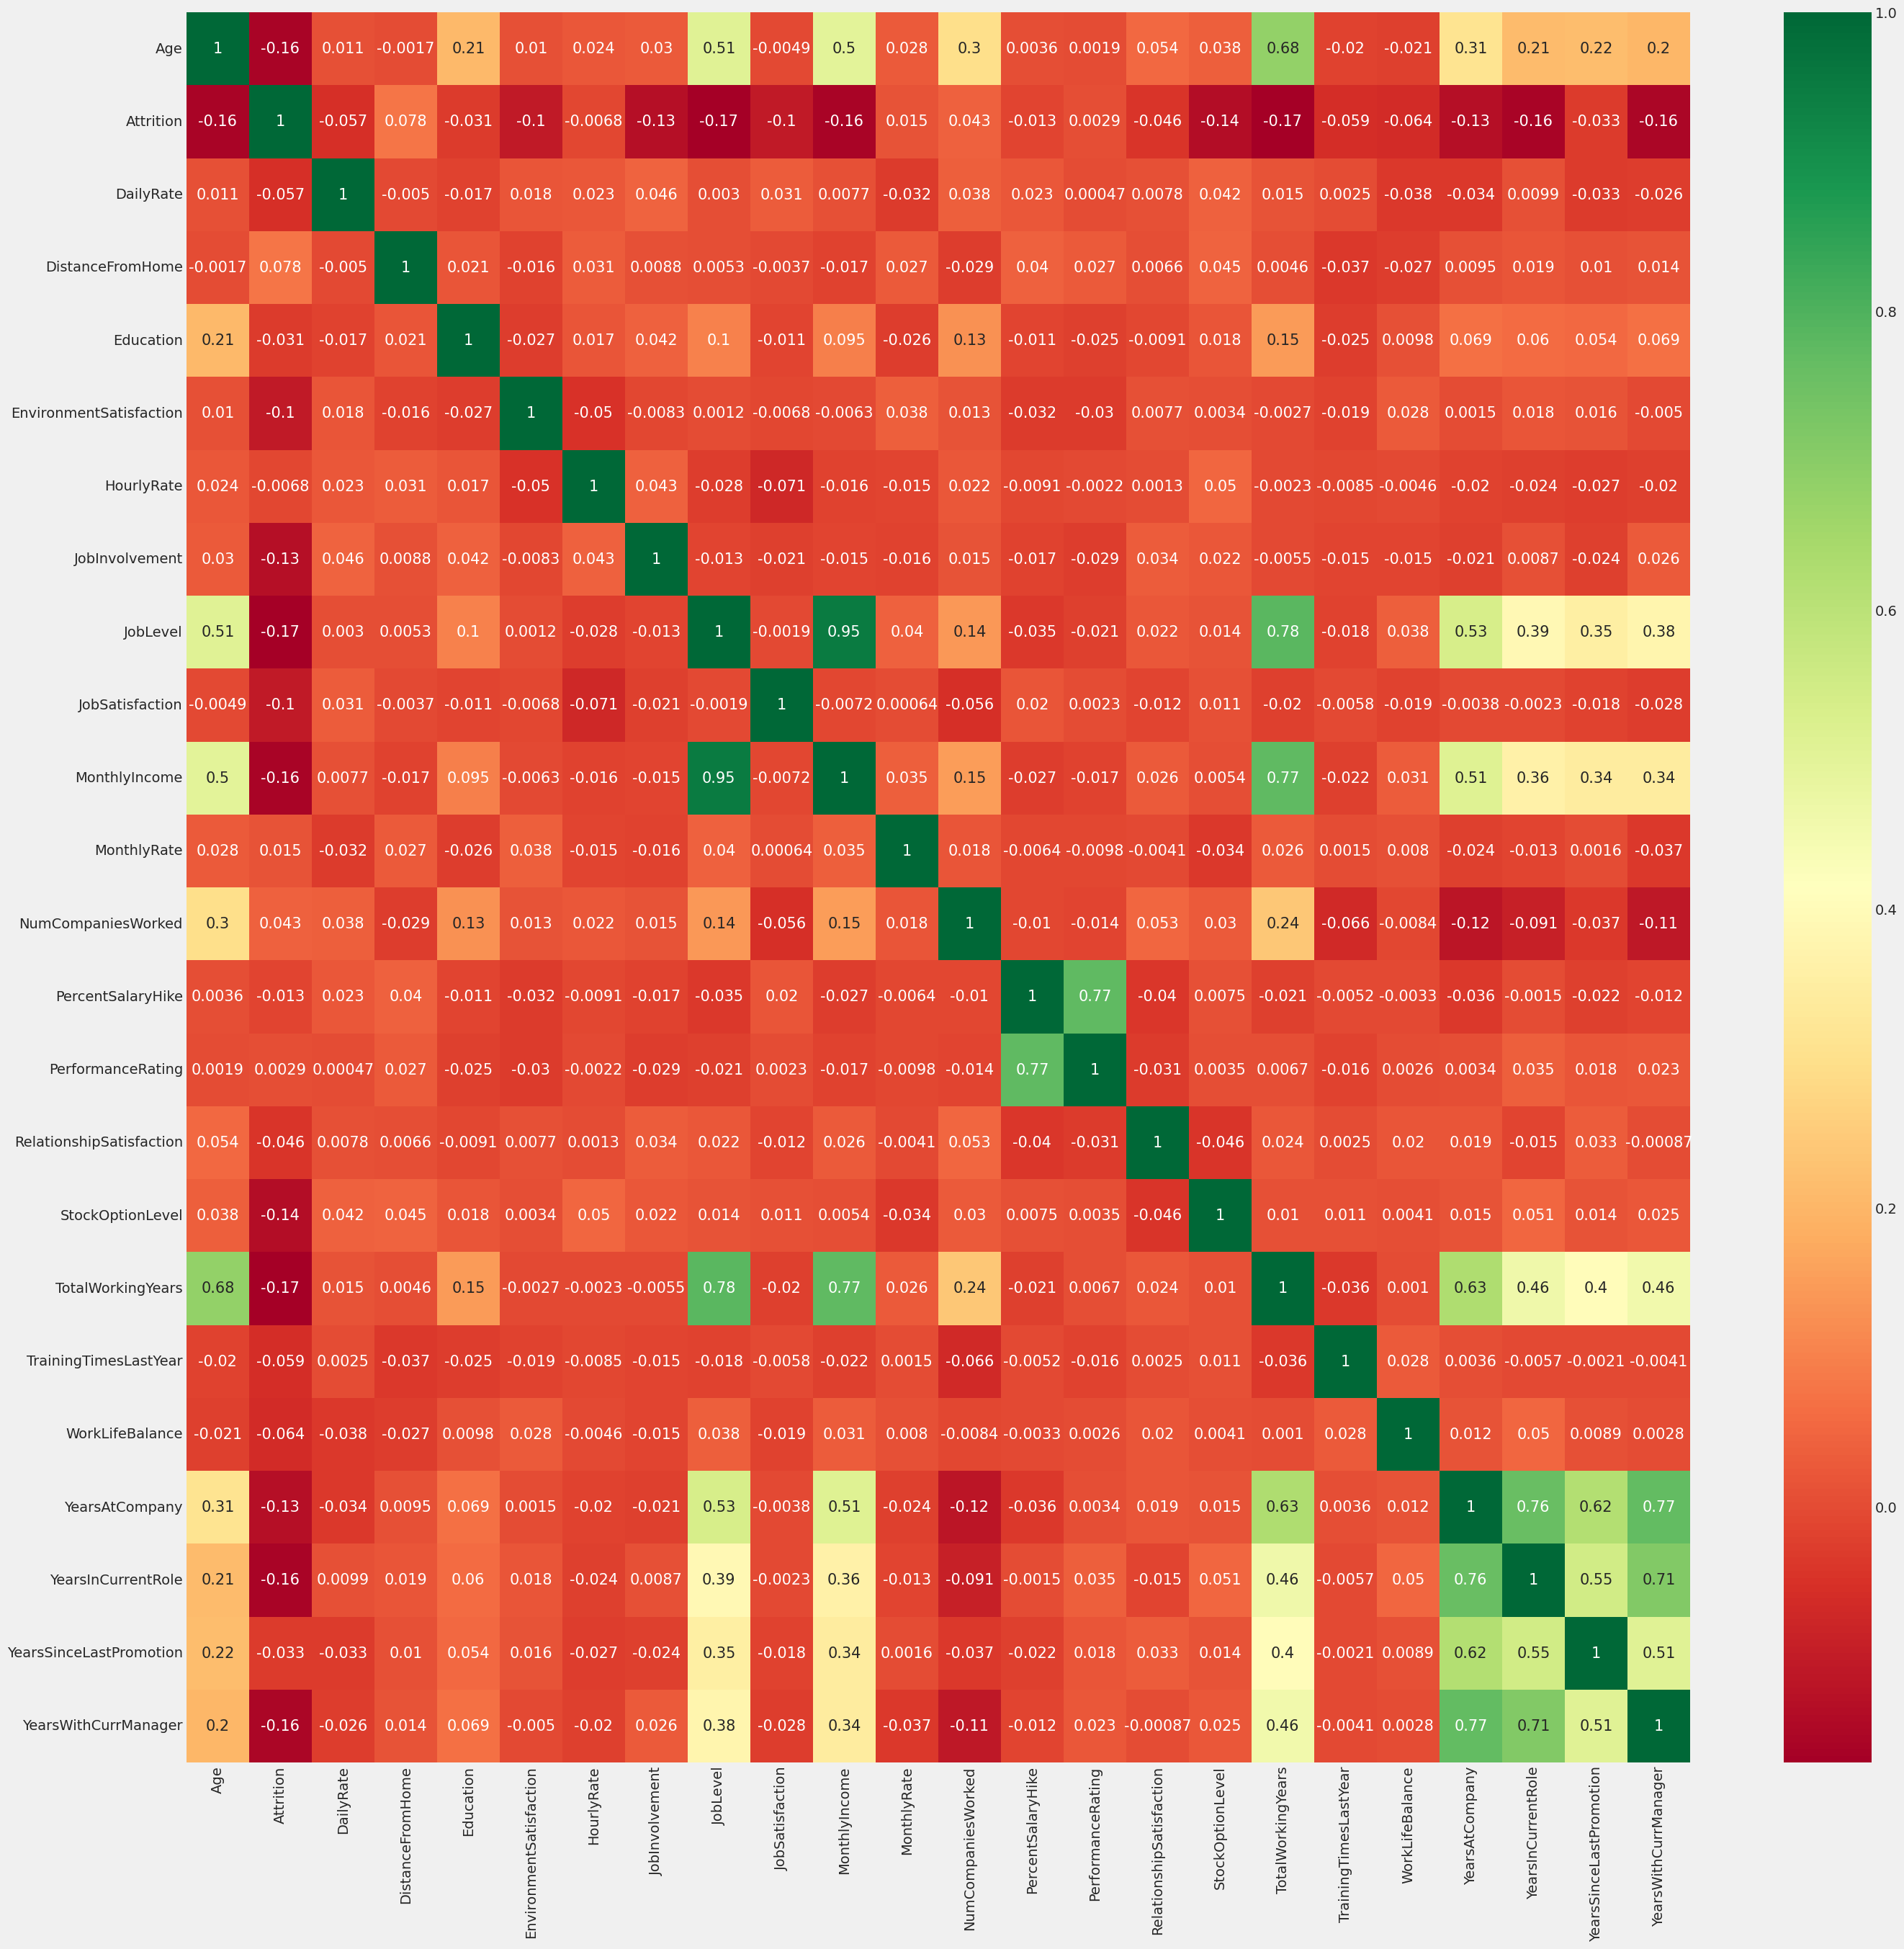

In [30]:
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Now, use this numeric_df for the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 15})

<Axes: >

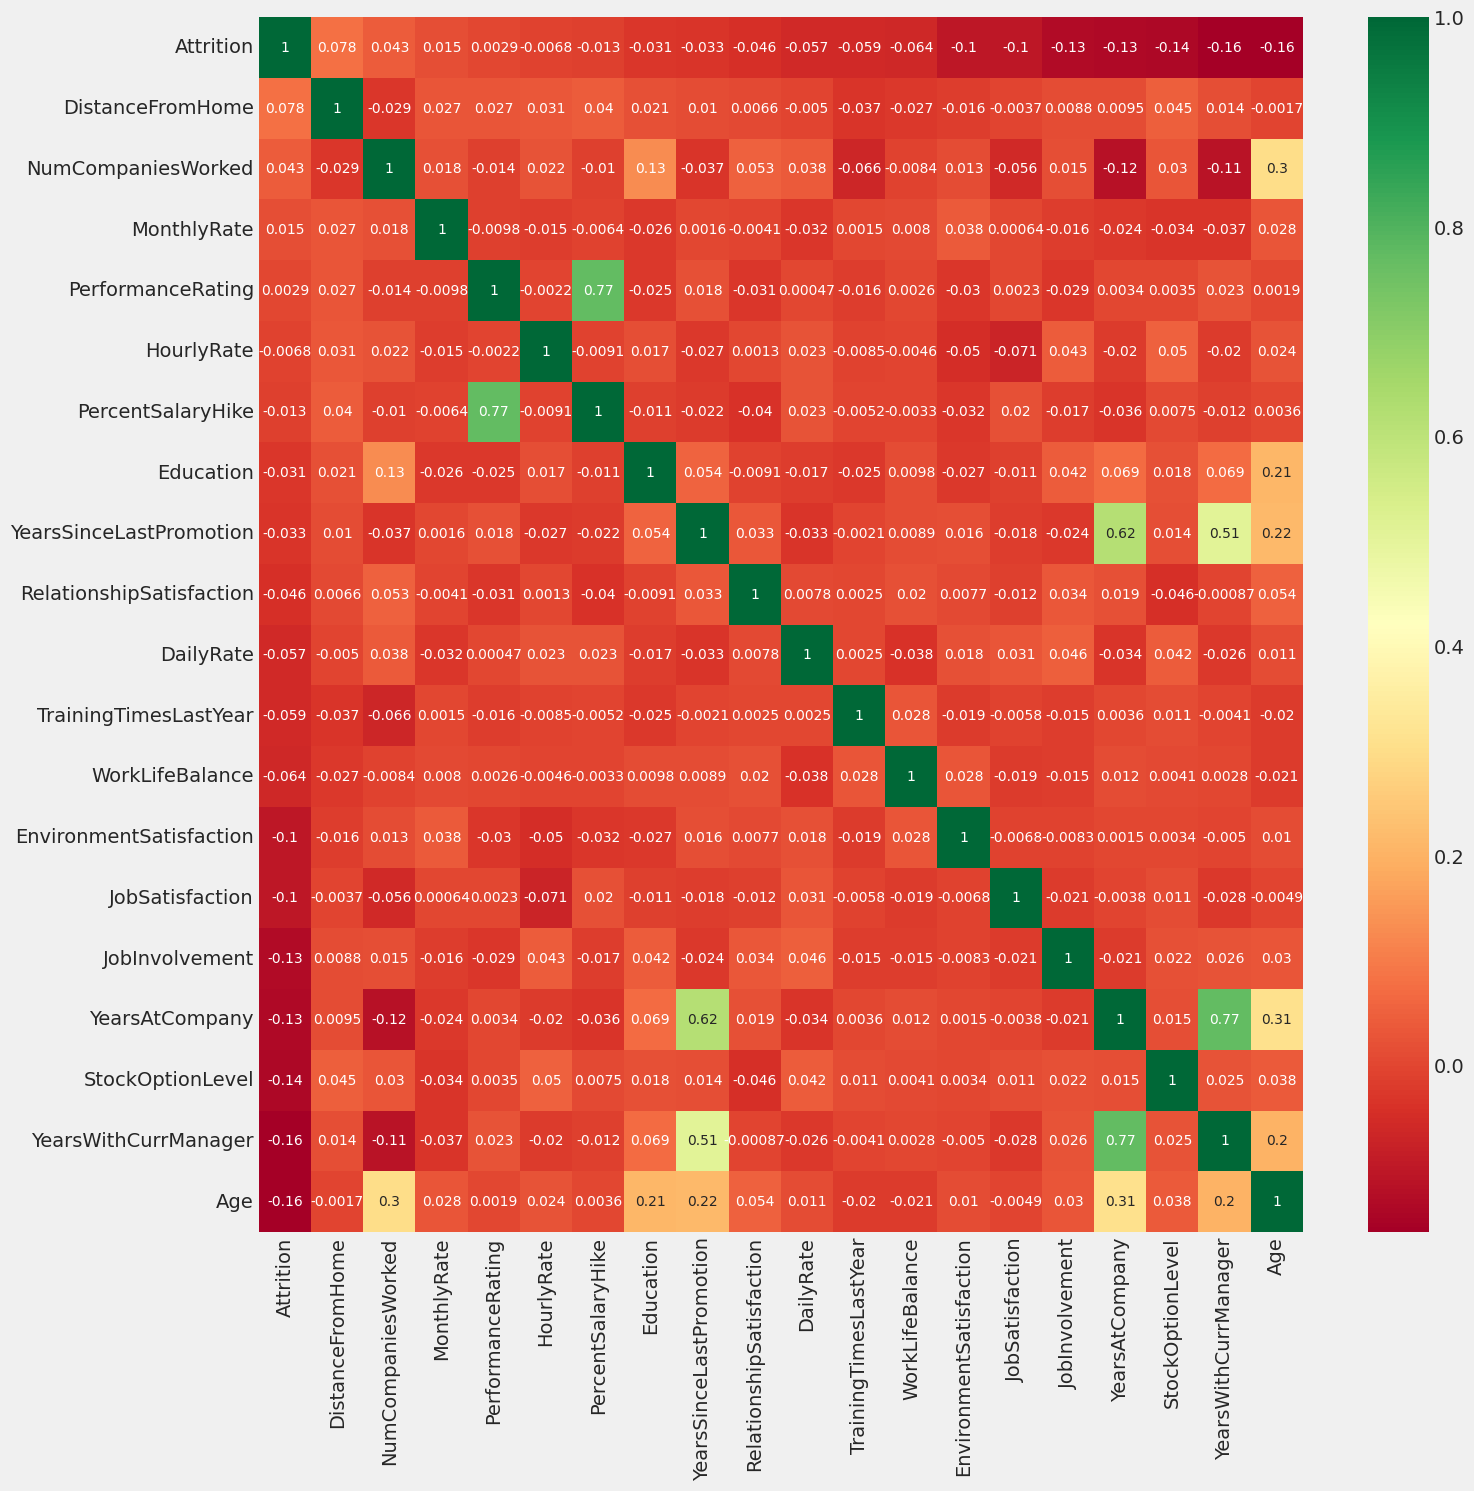

In [31]:
numeric_df = df.select_dtypes(include=[np.number])

# Get the top 20 features most correlated with 'Attrition'
col = numeric_df.corr().nlargest(20, 'Attrition')['Attrition'].index

# Create a DataFrame with only the top 20 correlated features
corr_df = numeric_df[col].corr()

# Generate the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn", annot_kws={"size": 10})

In [32]:
# Select only numeric columns (excluding 'Attrition' for the correlation)
numeric_cols = df.drop('Attrition', axis=1).select_dtypes(include=[np.number])

# Calculate the correlation with 'Attrition'
correlation = numeric_cols.corrwith(df['Attrition'])

# Plotting the correlation
correlation.hvplot.barh()

:Bars   [index]   (0)

## **Some Analysis of Correlation Results:**
- Monthly Income is highly correlated with Job level.
- Job level is highly correlated with Total Working Hours.
- Monthly Income is highly correlated with Total Working Hours.
- Age is also positively correlated with Total Working Hours.
- Marital status and Stock Option Level are negatively correlated

---
# Data Processing

In [33]:
# Transform categorical data into dummies - One-Hot-Encoding:
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [34]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [35]:
data.shape

(1470, 136)

<Axes: >

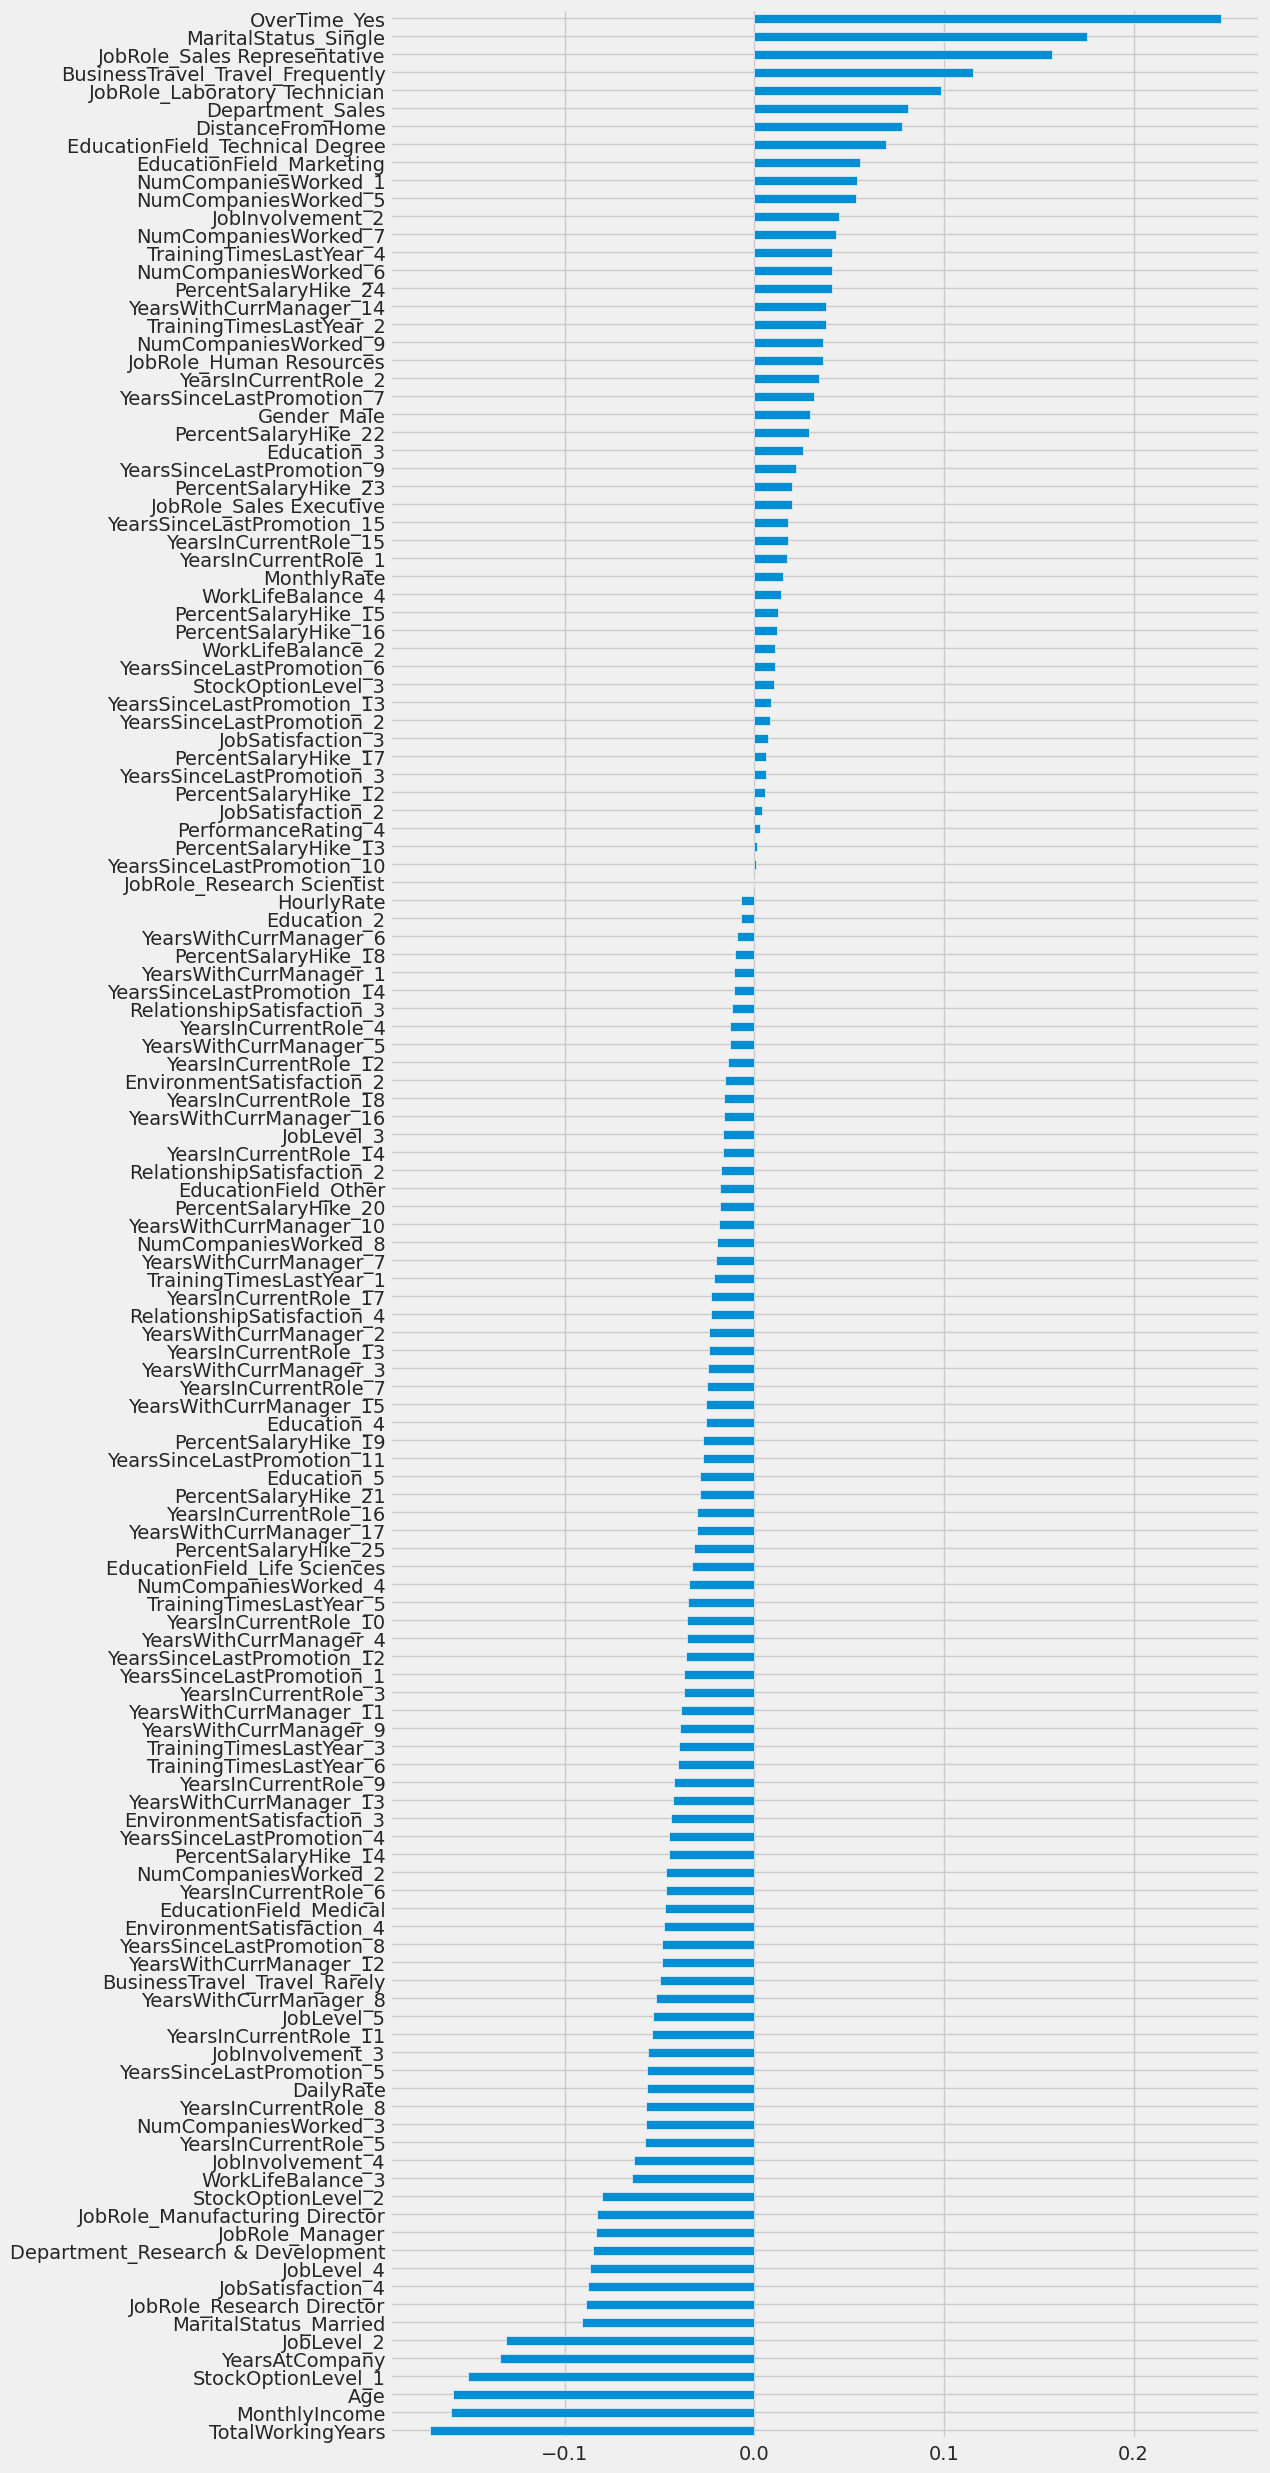

In [36]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [37]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

# Applying Machine Learning Algorithms

In [38]:
try:
    # Import necessary functions from scikit-learn to split and standardize dataset
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.preprocessing import StandardScaler

    X = data.drop('Attrition', axis=1)
    y = data.Attrition

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    X_std = scaler.transform(X)

    print("Completed Successfully")

except Exception as e:
    print("Process Error:", e)

Completed Successfully


In [39]:
#New dataframe to hold feature importance info
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [40]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

## 📌 Note
83.9% of No's for Attrition in dataset meaning there is a significant class imbalance i.e. if a model predicts "No" for attrition for all instances it would be correct 83.9% of the time. This imbalance needs to be taken into consideration going forward.

In [41]:
#Calculate % of stay / leave rates in the training and testing datasets
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [42]:
#Assess performance of ML model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.88      0.93       0.91          0.93
recall      0.98   0.64      0.93       0.81          0.93
f1-score    0.96   0.75      0.93       0.85          0.92
support   863.00 166.00      0.93    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.56      0.85       0.73          0.84
recall      0.94  0.39      0.85       0.67          0.85
f1-score    0.91  0.46      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


## 📌 Note
92.91% accuracy score is a good overall performance for the logistic regression model but it doesn't reflect the class imbalance.

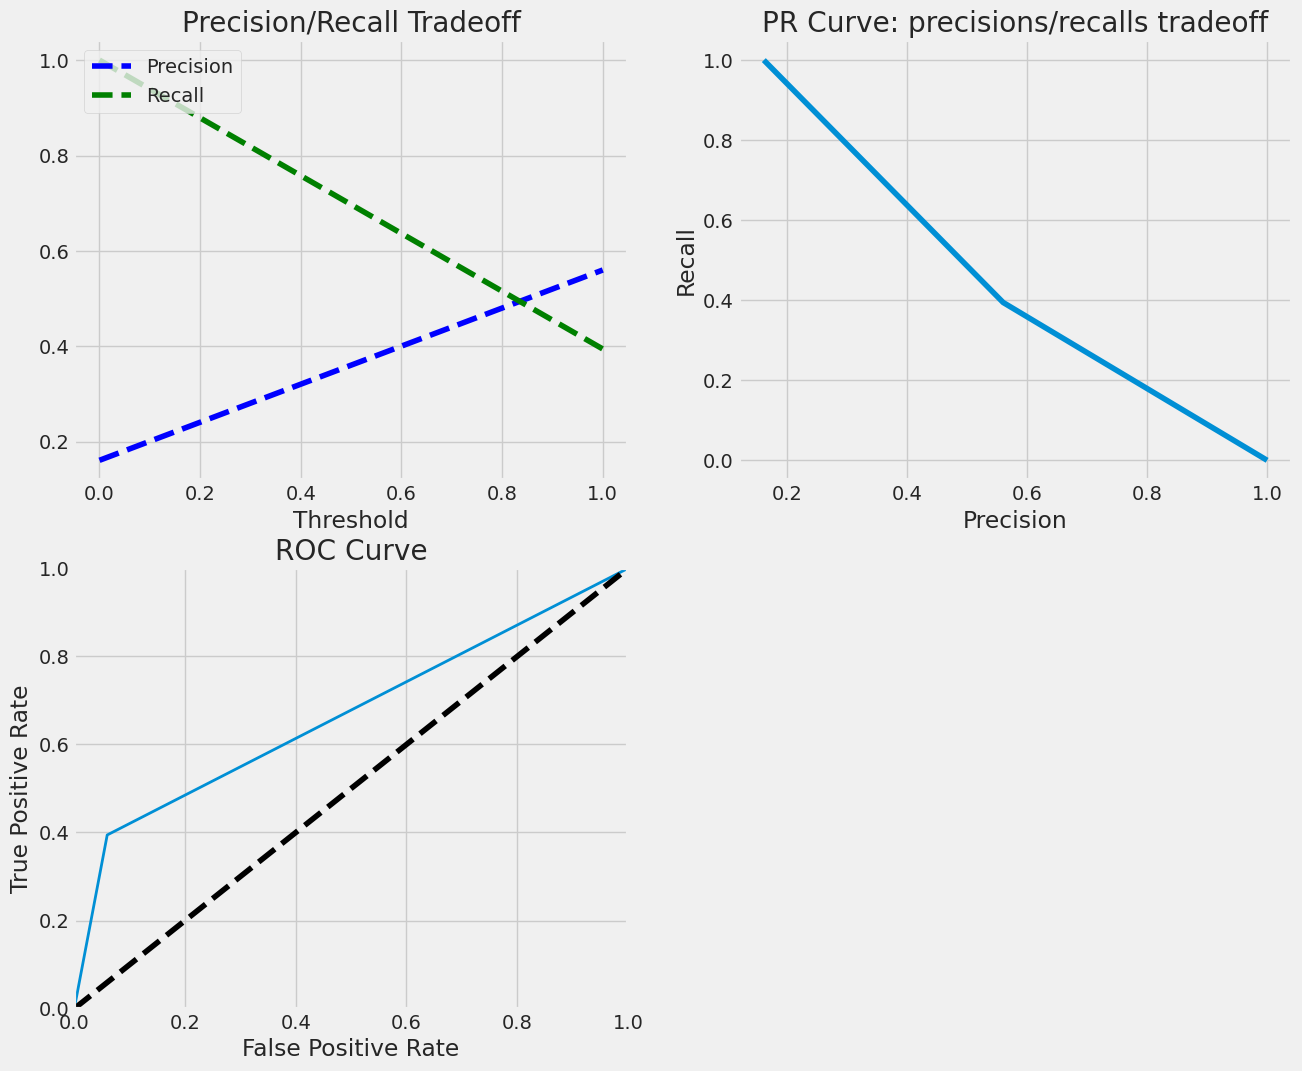

In [44]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [45]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[359  11]
 [ 62   9]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.45      0.83       0.65          0.79
recall      0.97  0.13      0.83       0.55          0.83
f1-score    0.91  0.20      0.83       0.55          0.79
support   370.00 71.00      0.83     441.00        441.00


In [47]:
param_grid = {
    'n_estimators': [100, 500, 900],
    # 'max_features': ['auto', 'sqrt'],  # Deprecated usage, 'sqrt' is default.
    'max_depth': [2, 3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 15 151]]
ACCURACY SCORE:
0.9854
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.91      0.99       0.95          0.99
f1-score    0.99   0.95      0.99       0.97          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 63   8]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.44      0.83       0.65          0.79
recall      0.97  0.11      0.83       0.54          0.83
f1-score    0.91  0.18      0.83       0.54          0.79
support   370.00 71.00      0.83     441.00        441.00


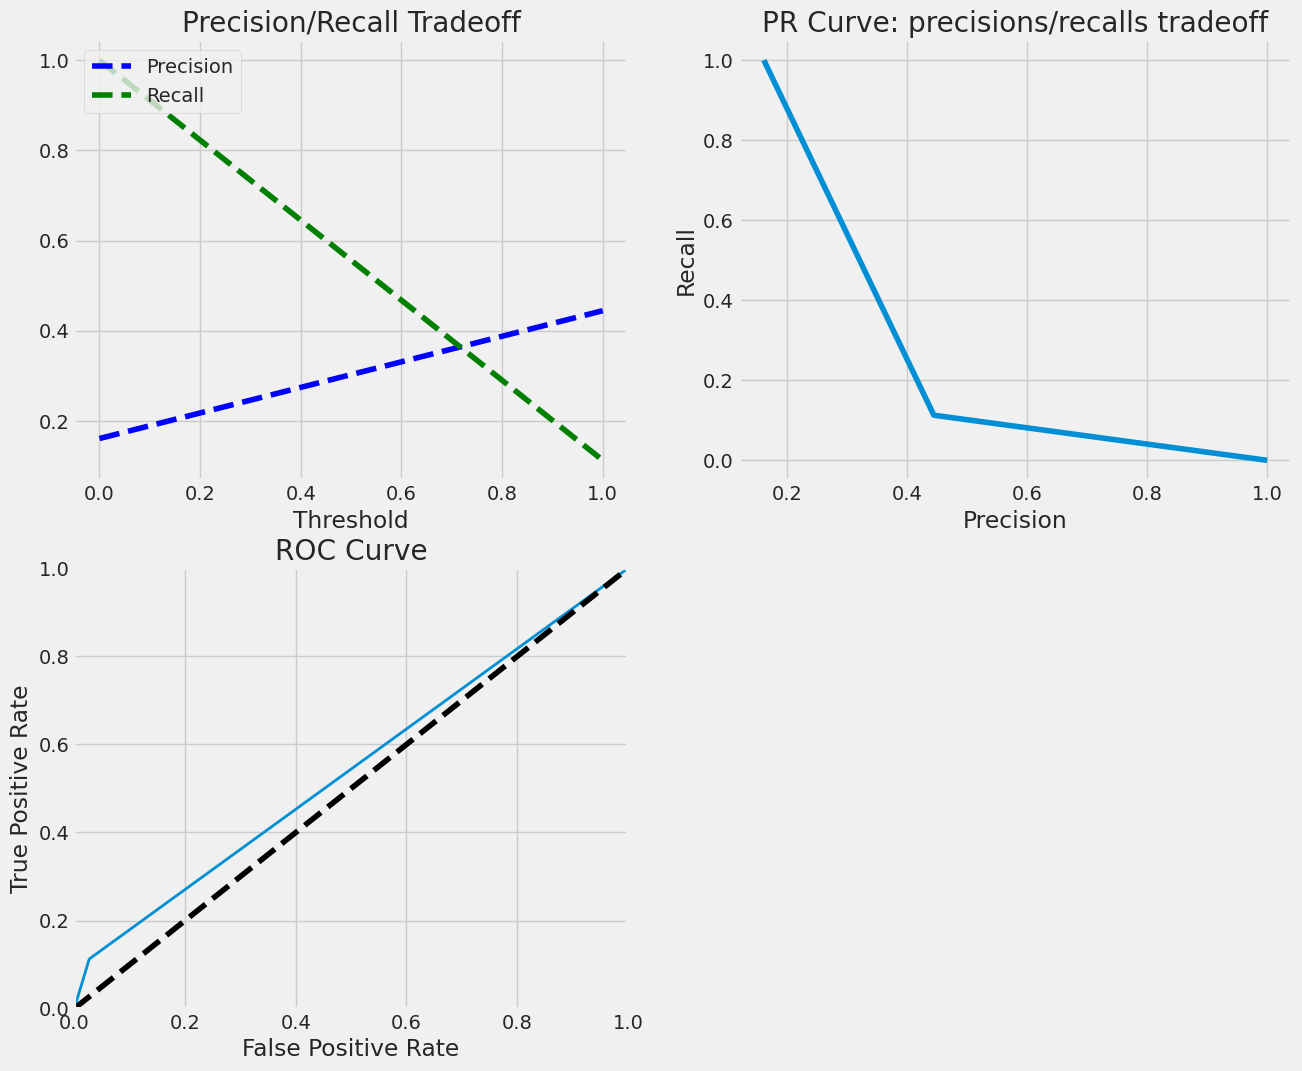

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [49]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

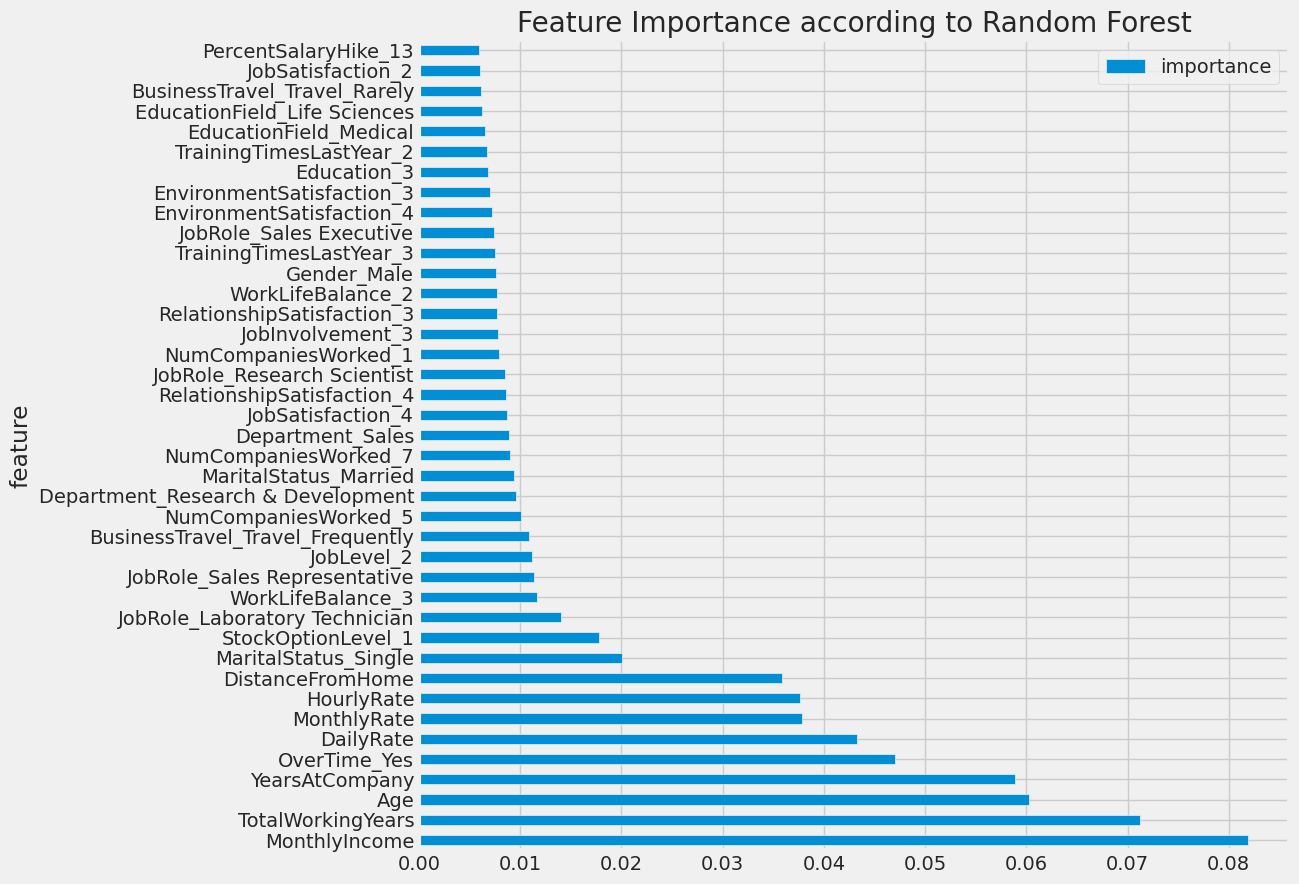

In [50]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

## Support Vector Machine

In [51]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 47 119]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.94      0.95       0.94          0.95
recall      0.99   0.72      0.95       0.85          0.95
f1-score    0.97   0.81      0.95       0.89          0.94
support   863.00 166.00      0.95    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.52      0.84       0.70          0.83
recall      0.93  0.38      0.84       0.66          0.84
f1-score    0.91  0.44      0.84       0.67          0.83
support   370.00 71.00      0.84     441.00        441.00


In [52]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [53]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.99   0.99      0.99       0.99          0.99
recall      1.00   0.96      0.99       0.98          0.99
f1-score    1.00   0.98      0.99       0.99          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.55      0.85       0.72          0.84
recall      0.94  0.41      0.85       0.67          0.85
f1-score    0.91  0.47      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


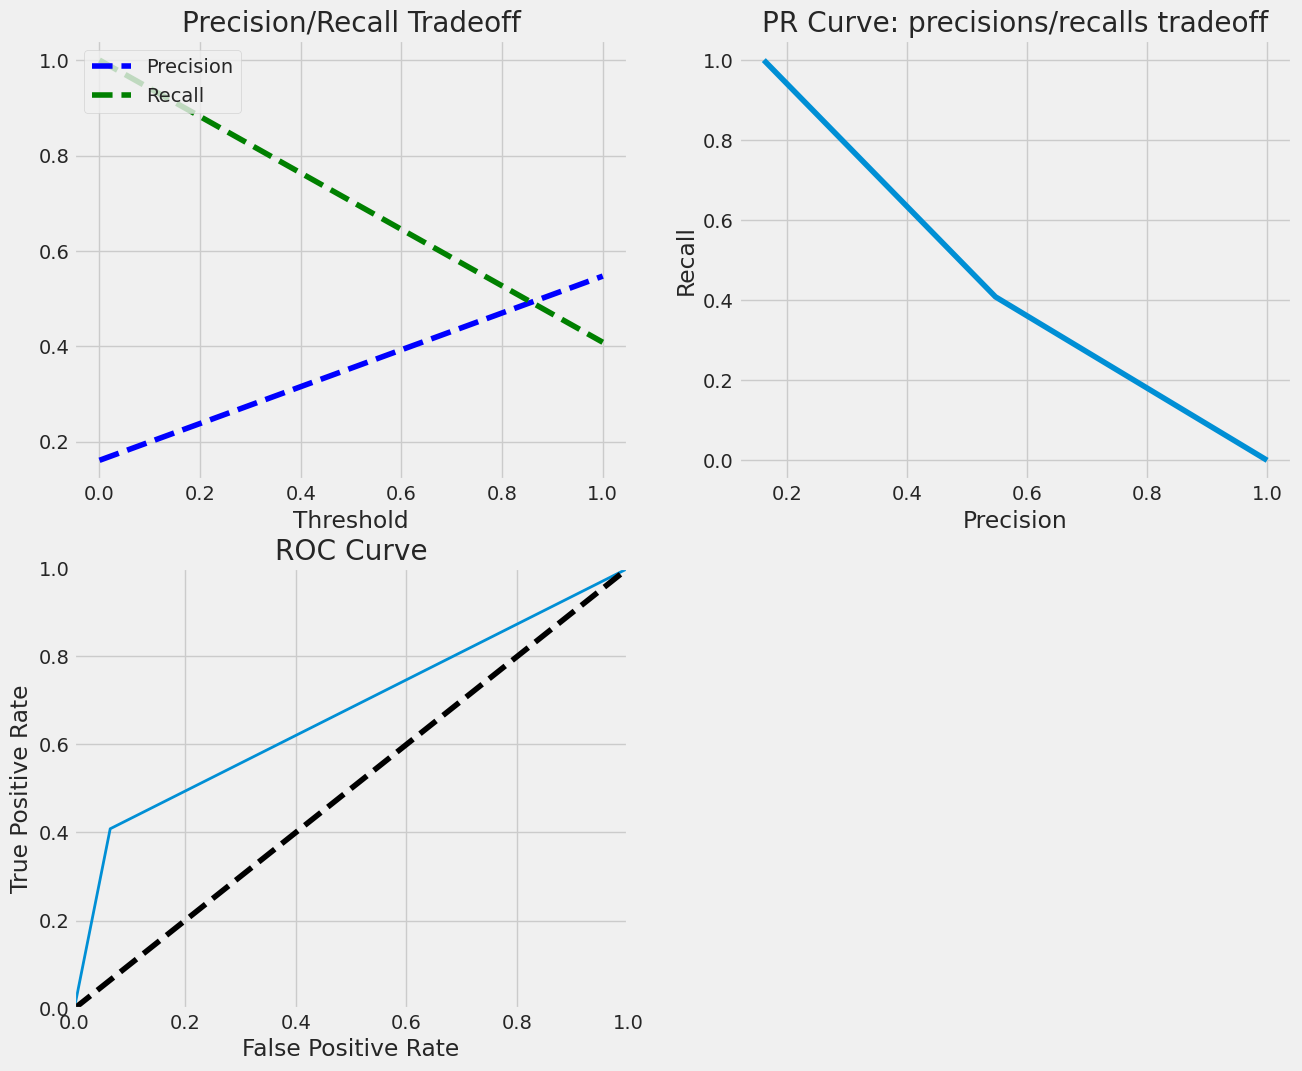

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [55]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

## XGBoost Classifier

In [56]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[356  14]
 [ 51  20]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.59      0.85       0.73          0.83
recall      0.96  0.28      0.85       0.62          0.85
f1-score    0.92  0.38      0.85       0.65          0.83
support   370.00 71.00      0.85     441.00        441.00


In [57]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

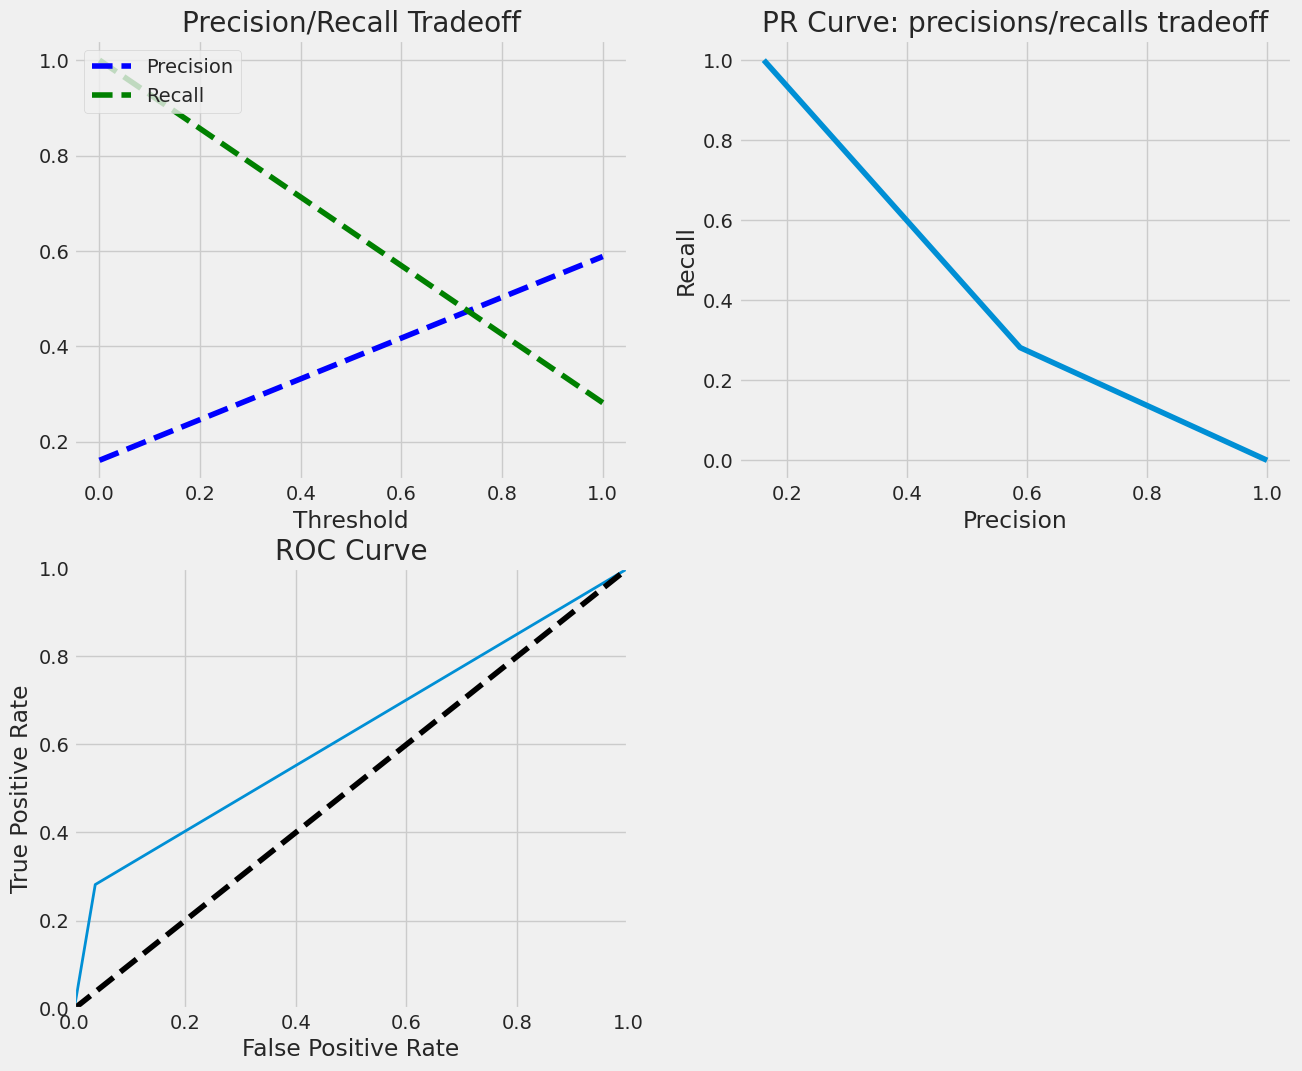

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

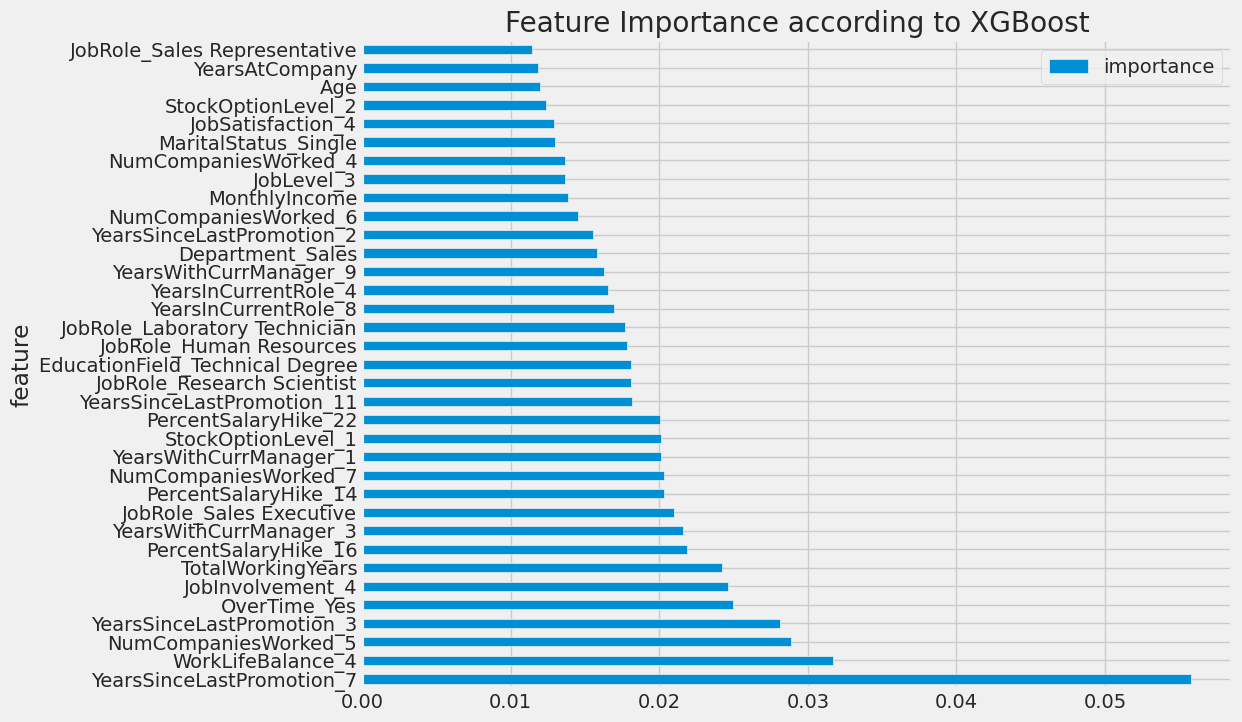

In [59]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

## LightGBM

In [60]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 53  18]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.58      0.85       0.73          0.82
recall      0.96  0.25      0.85       0.61          0.85
f1-score    0.92  0.35      0.85       0.63          0.82
support   370.00 71.00      0.85     441.00        441.00


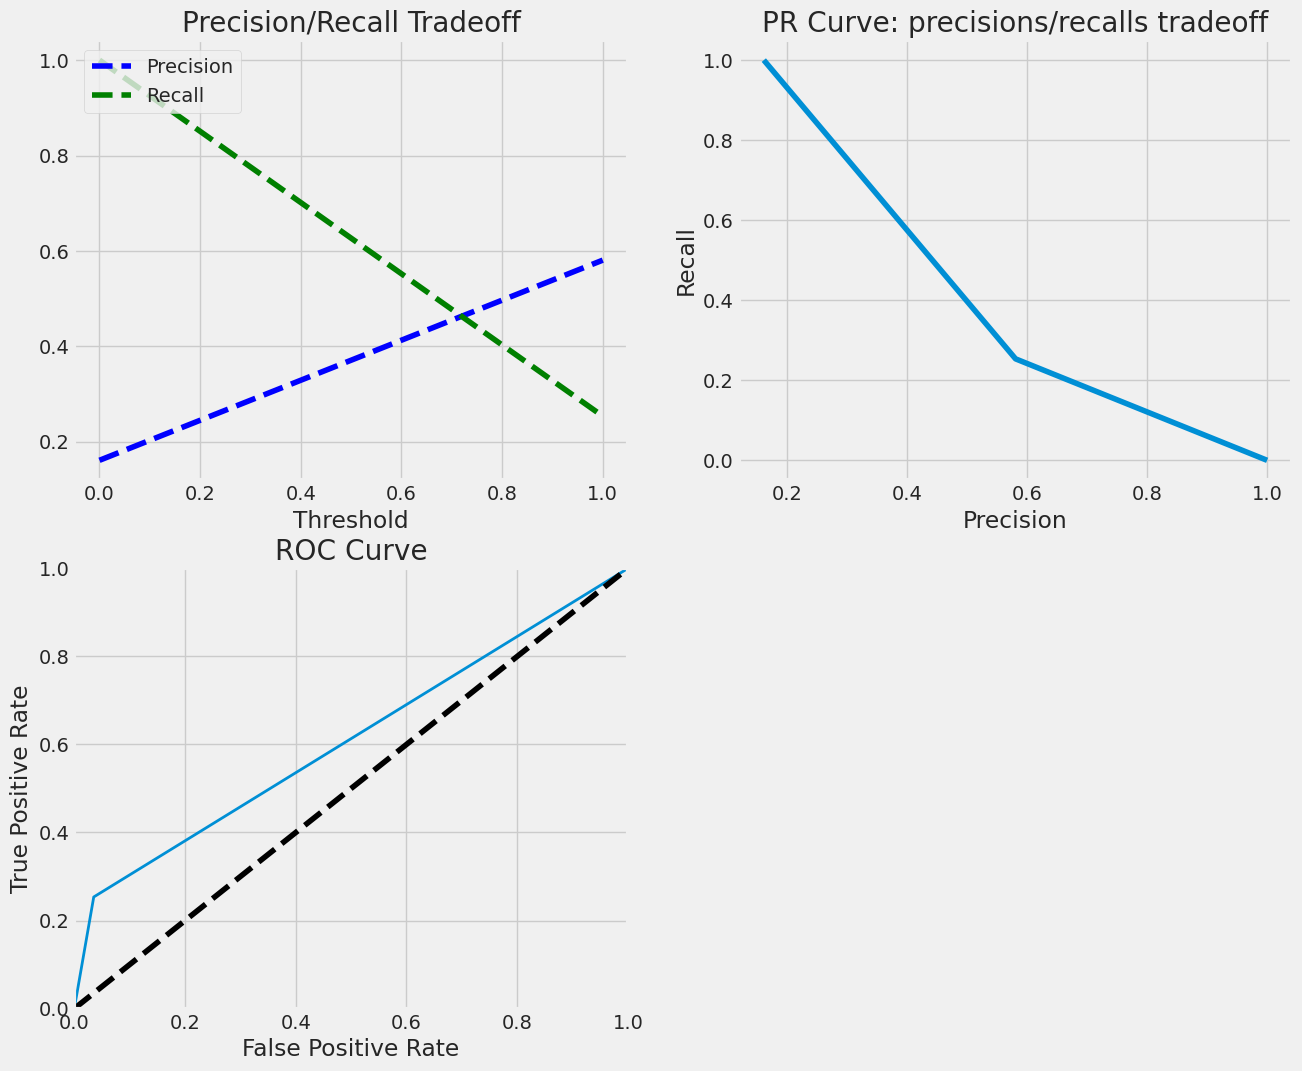

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [62]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to LightGBM')

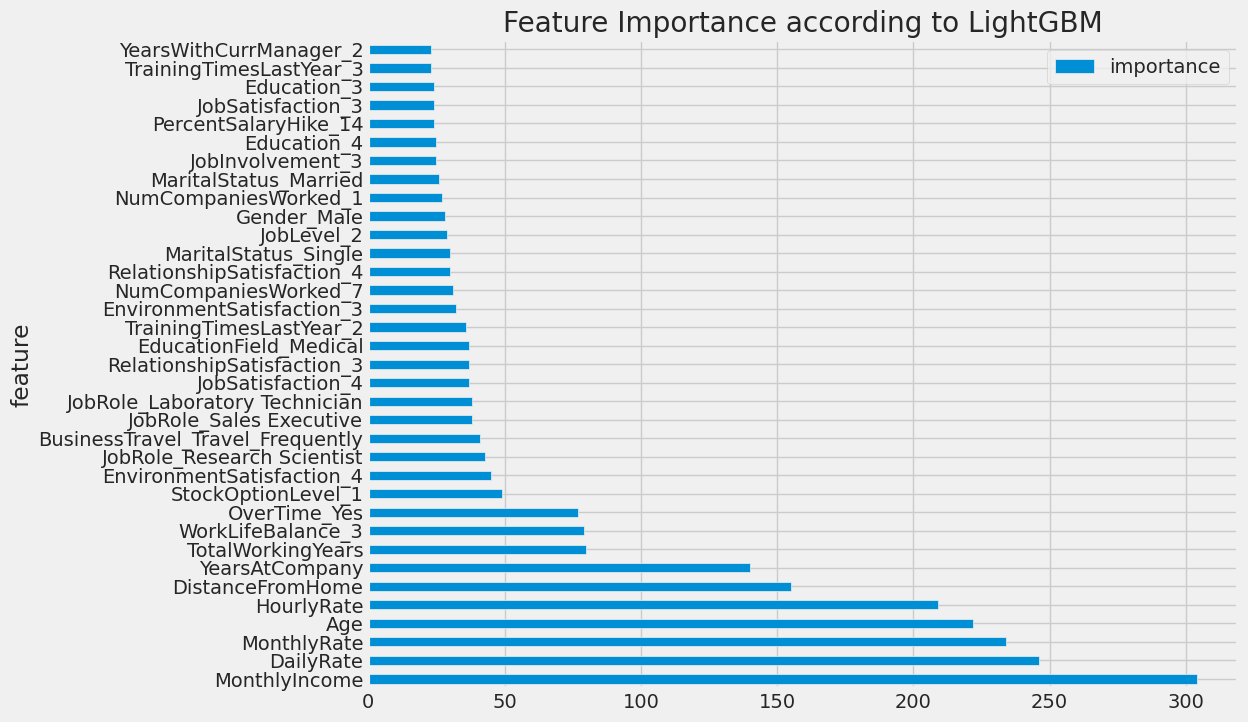

In [63]:
df = feature_imp(X, lgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to LightGBM')

## CatBoost

In [64]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.98       0.99          0.98
recall      1.00   0.90      0.98       0.95          0.98
f1-score    0.99   0.95      0.98       0.97          0.98
support   863.00 166.00      0.98    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 57  14]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.61      0.85       0.74          0.82
recall      0.98  0.20      0.85       0.59          0.85
f1-score    0.92  0.30      0.85       0.61          0.82
support   370.00 71.00      0.85     441.00        441.00


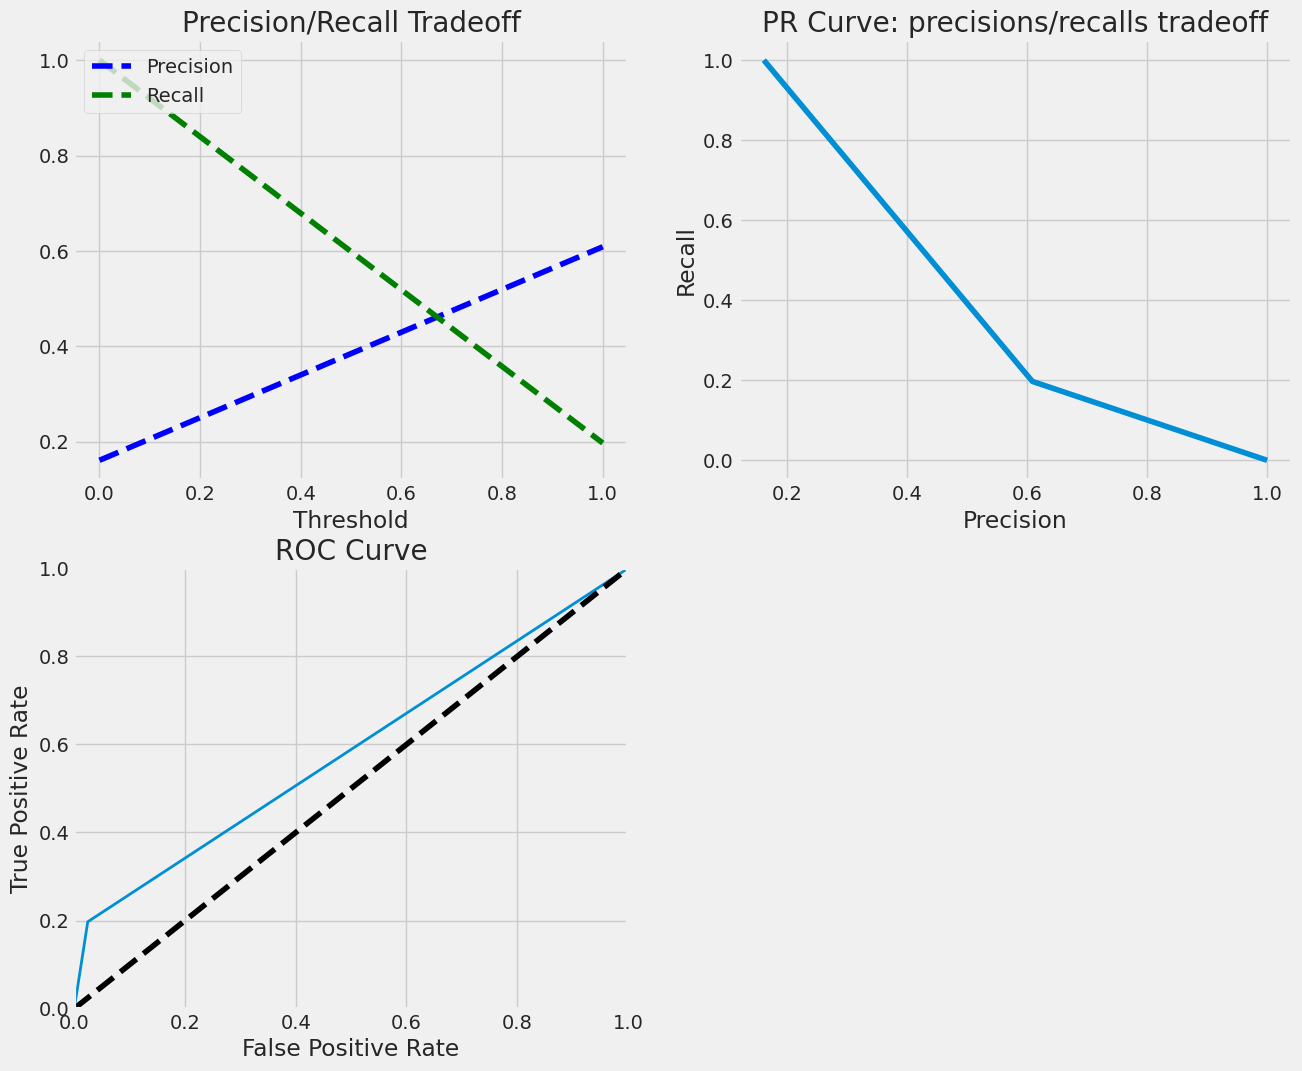

In [65]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [66]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to CatBoost')

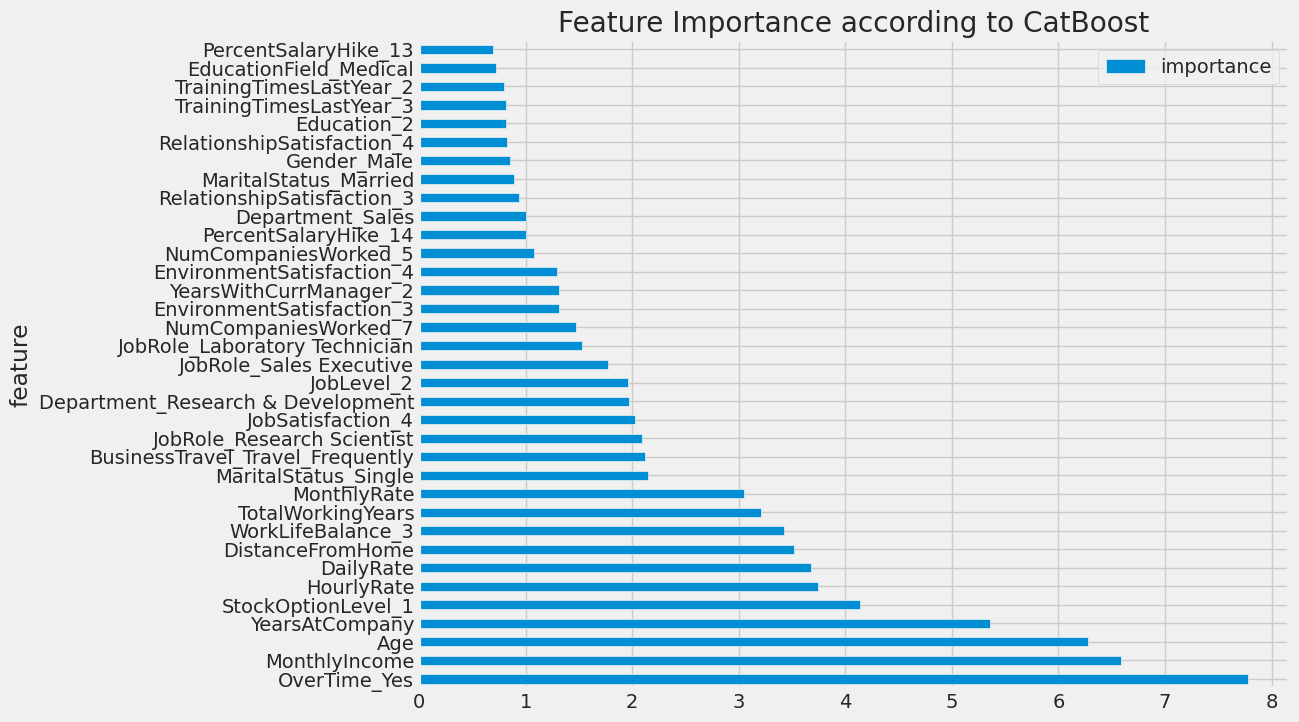

In [67]:
df = feature_imp(X, cb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to CatBoost')

## AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[843  20]
 [ 88  78]]
ACCURACY SCORE:
0.8950
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.80      0.90       0.85          0.89
recall      0.98   0.47      0.90       0.72          0.90
f1-score    0.94   0.59      0.90       0.77          0.88
support   863.00 166.00      0.90    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  26]
 [ 52  19]]
ACCURACY SCORE:
0.8231
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.42      0.82       0.65          0.80
recall      0.93  0.27      0.82       0.60          0.82
f1-score    0.90  0.33      0.82       0.61          0.81
support   370.00 71.00      0.82     441.00        441.00


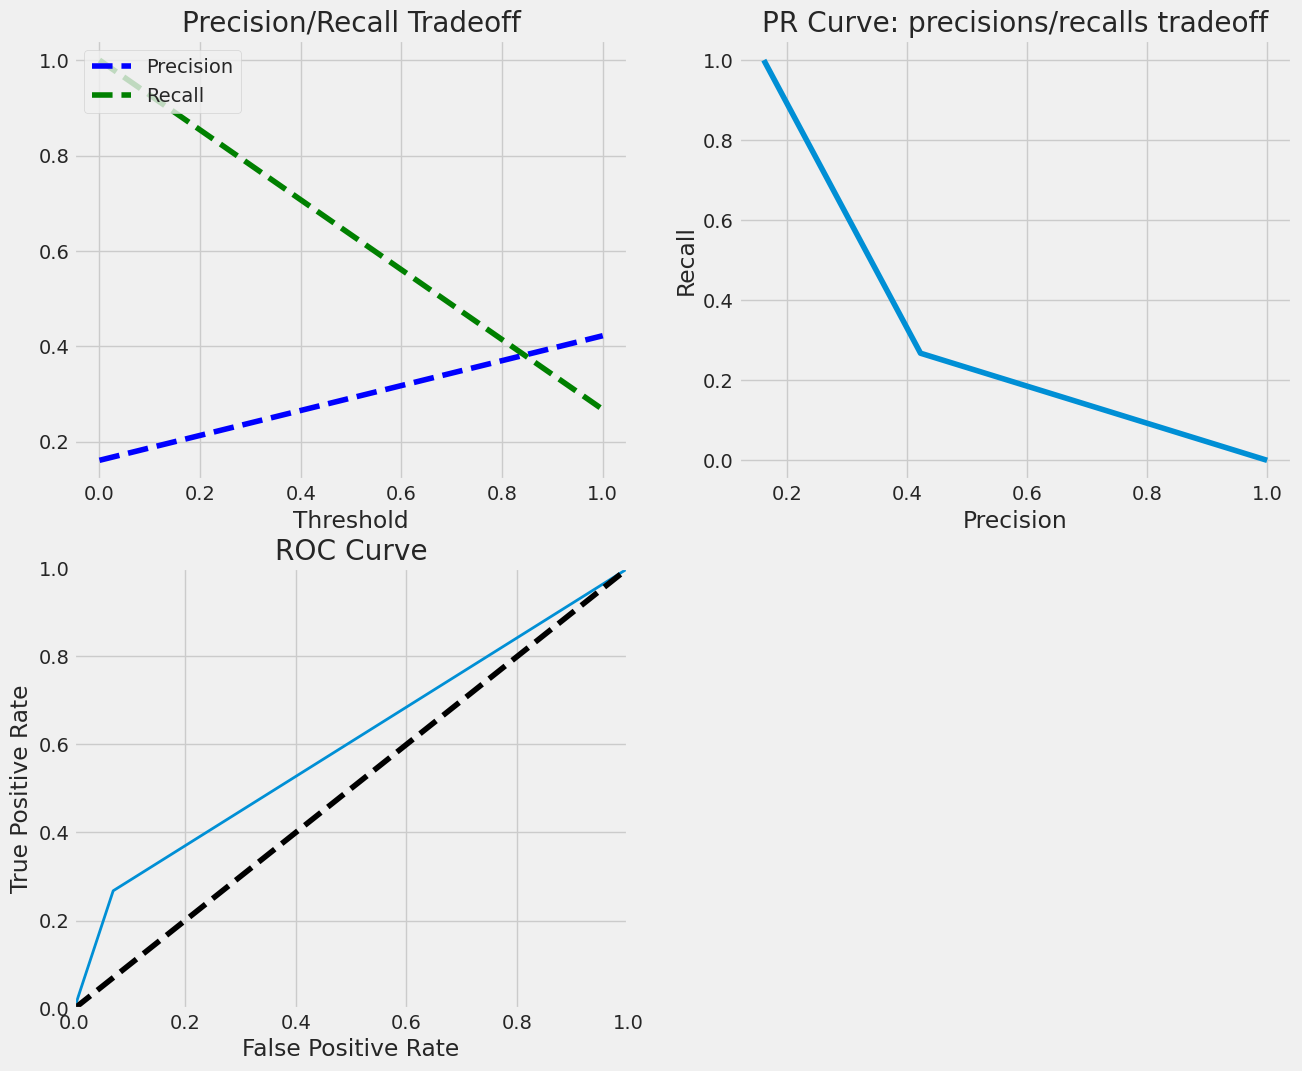

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [70]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

# Comparing Models Prerformance 📊

In [71]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.543
XGBOOST                        roc_auc_score: 0.622
LOGISTIC REGRESSION            roc_auc_score: 0.546
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
LIGHTGBM                       roc_auc_score: 0.609
CATBOOST                       roc_auc_score: 0.586
ADABOOST                       roc_auc_score: 0.599


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [72]:
scores_df = pd.DataFrame(scores_dict)
# scores_df.plot(kind='barh', figsize=(15, 8))
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)

In [73]:
import numpy as np
import pandas as pd
from collections import Counter

# Assuming 'X' is your features DataFrame and each of your models has been fitted

# Create a DataFrame to hold all importances with feature names from X
feature_names = X.columns.tolist()  # Convert column names to a list
importances_df = pd.DataFrame(index=feature_names)

# Assuming rf_clf, xgb_clf, lgb_clf, cb_clf, and ab_clf are your trained tree-based models
importances_df['Random Forest'] = rf_clf.feature_importances_
importances_df['XGBoost'] = xgb_clf.feature_importances_
importances_df['LightGBM'] = lgb_clf.feature_importances_
importances_df['CatBoost'] = cb_clf.feature_importances_
importances_df['AdaBoost'] = ab_clf.feature_importances_

# Assuming lr_clf and svm_clf are your trained logistic regression and SVM models
# If you're using SVM with a non-linear kernel, this won't work as SVM doesn't provide coef_ for non-linear kernels
importances_df['Logistic Regression'] = np.abs(lr_clf.coef_[0])
importances_df['Support Vector Machine'] = np.abs(svm_clf.coef_[0]) if hasattr(svm_clf, 'coef_') else np.nan

# Normalize the importances to sum to 1 across rows (features)
importances_df = importances_df.div(importances_df.sum(axis=0), axis=1)

# Rank the features in each model and take the top N
top_n = 5
top_features_per_model = importances_df.apply(lambda x: x.nlargest(top_n).index)

# Flatten the list and count the occurrences of each feature
common_features_count = Counter(top_features_per_model.values.flatten())

# Most common features across all models
most_common_features = common_features_count.most_common(top_n)

# Output the most common features
print("Top 5 most common features across all models:")
for feature, count in most_common_features:
    print(f"{feature}: {count}")


Top 5 most common features across all models:
MonthlyIncome: 5
Age: 5
OverTime_Yes: 4
DailyRate: 3
HourlyRate: 3


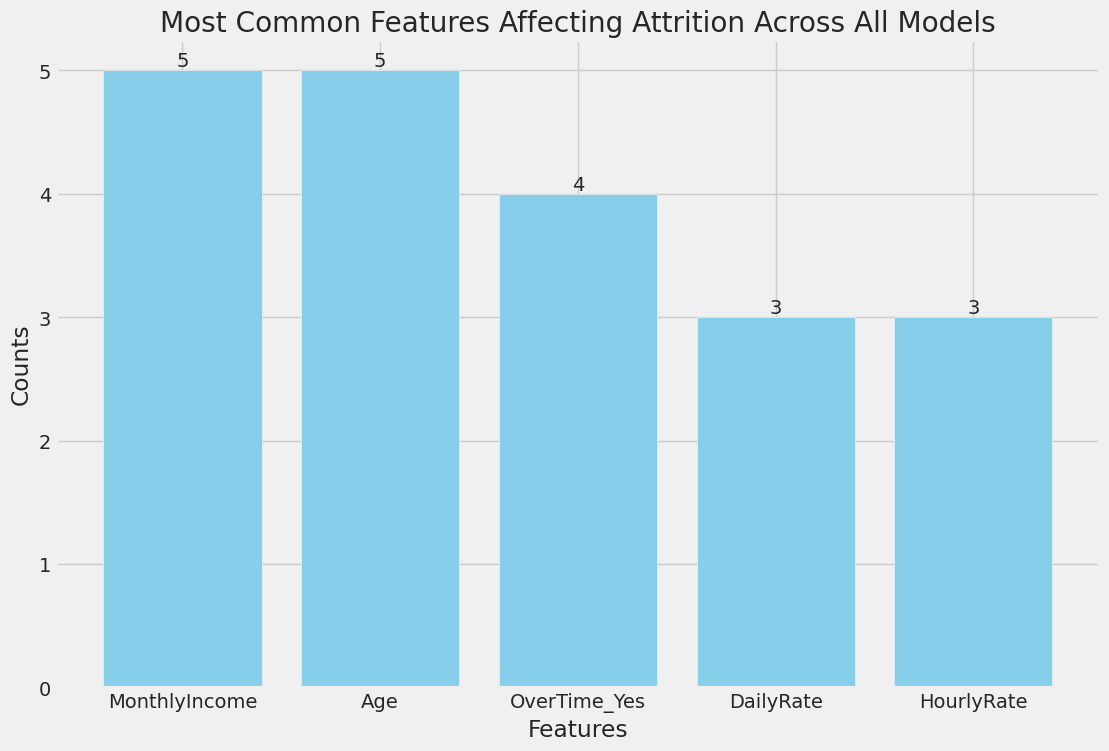

In [74]:
# Extract feature names and their counts for plotting
features, counts = zip(*most_common_features)

# Create bar plot
plt.figure(figsize=(12, 8))
plt.bar(features, counts, color='skyblue')

# Add title and labels
plt.title('Most Common Features Affecting Attrition Across All Models')
plt.xlabel('Features')
plt.ylabel('Counts')

# Add value labels on top of each bar
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

## 📌 Inferences

- Most common features affecting employee attrition at IBM are '*MonthlyIncome*' , '*Age*', '*OverTime*','*Dailyrate*'and '*HourlyRate*' showing that employee pay/remuneration has a significant on whether they will stay with an organization long term.

- Possible measures IBM can take to improve employee retention are:

1. **Competitive Compensation**: Regularly review and adjust salaries and hourly rates to ensure they are competitive with the market. Use salary surveys and industry benchmarks to stay competitive.

2. **Performance Bonuses**: Implement or enhance performance-based bonuses to reward high-performing employees, providing them with additional financial incentives.

3. **Career Advancement Opportunities**: Create clear career paths and promotion opportunities. Employees are more likely to stay if they see a future for themselves within the company.
 
4. **Flexible Working Hours**: Offer flexible working schedules to help employees balance their work and personal life, which could reduce the need for overtime and the stress associated with long hours.
 
5. **Remote Work Options**: Allow for remote work or hybrid models where employees can choose to work from home on certain days, reducing their daily commute and improving work-life balance.
 
6. **Overtime Management**: Manage overtime effectively by either compensating with time-off-in-lieu or ensuring overtime pay is adequate and timely.
 
7. **Financial Education**: Provide financial planning services as part of the employee benefits package to help employees make the most of their income.

- 
